In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./work/BDCI/train.csv",encoding='gb18030')
df.head()

,id,fact,label
0,id_0,罪犯陈中盛，男，1954年xx月xx日出生，汉族，湖南省永兴县人，文盲，现在河南省新郑监狱服...,12
1,id_1,罪犯王中国，男，1982年xx月xx日生，汉族，吉林省长春市宽城区人，初中毕业，现在吉林省长...,13
2,id_2,罪犯张仁奇，现在宁夏回族自治区银川监狱服刑，以被告人张仁奇犯信用卡诈骗罪，判处有期徒刑刑期六...,8
3,id_3,罪犯吴晨，男，1988年xx月xx日出生，瑶族，广西巴马县人，初中文化，原住广西巴马县巴马镇...,7
4,id_4,罪犯夏宏，女，1980年xx月xx日出生，汉族，初中文化，湖南省邵阳市大祥区人，住湖南省邵阳...,6


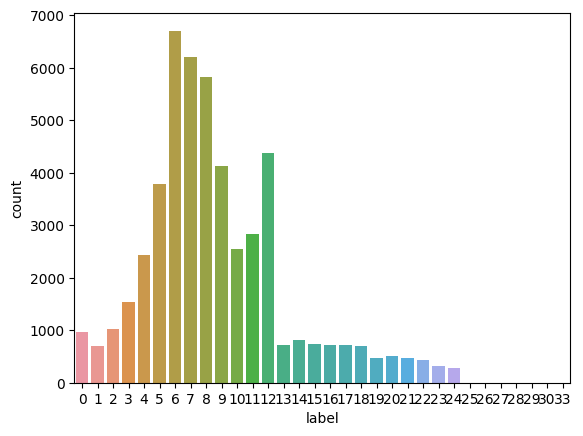

In [5]:
sns.countplot(df.label) 

# 类别不平衡
1. 去掉25以后的类别
2. 采用f1_loss


In [8]:
def count_text_len(data):
    indexs = []
    length = []
    for index,row in data.iterrows():
        indexs.append(index)
        length.append(len(row[1]))

    return list(zip(indexs,length)),length

index_len_list , len_list = count_text_len(df)


In [17]:
len_list

[727,
 1162,
 602,
 516,
 659,
 558,
 375,
 828,
 527,
 812,
 291,
 674,
 635,
 272,
 561,
 623,
 530,
 562,
 876,
 445,
 591,
 612,
 496,
 1166,
 559,
 557,
 544,
 505,
 643,
 718,
 488,
 517,
 1168,
 641,
 558,
 679,
 519,
 386,
 512,
 606,
 556,
 583,
 511,
 649,
 670,
 734,
 509,
 658,
 675,
 511,
 718,
 390,
 680,
 454,
 708,
 872,
 667,
 602,
 586,
 665,
 764,
 375,
 706,
 395,
 598,
 390,
 770,
 490,
 684,
 449,
 465,
 752,
 633,
 763,
 355,
 887,
 622,
 530,
 619,
 738,
 542,
 400,
 434,
 836,
 426,
 914,
 475,
 706,
 751,
 384,
 366,
 299,
 815,
 729,
 401,
 598,
 836,
 767,
 630,
 453,
 568,
 539,
 830,
 643,
 695,
 388,
 542,
 461,
 775,
 537,
 548,
 560,
 500,
 734,
 366,
 846,
 435,
 450,
 425,
 521,
 638,
 536,
 549,
 746,
 394,
 845,
 597,
 863,
 587,
 472,
 648,
 694,
 692,
 363,
 508,
 564,
 367,
 275,
 661,
 901,
 918,
 875,
 749,
 674,
 698,
 399,
 354,
 704,
 611,
 765,
 790,
 597,
 531,
 467,
 812,
 945,
 595,
 603,
 699,
 712,
 834,
 522,
 615,
 700,
 538,
 966,
 

<BarContainer object of 50001 artists>

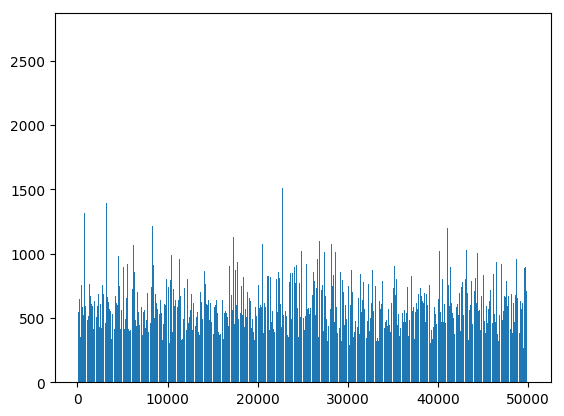

In [22]:
x=range(len(len_list))
plt.bar(x,len_list)



In [27]:
count500 = list(filter(lambda x:x>500,len_list))
count1000 = list(filter(lambda x:x>1000,len_list))
len(count500),len(count1000)

(32625, 1485)

In [30]:
text = df.loc[0][1]
text.split('。',)

['罪犯陈中盛，男，1954年xx月xx日出生，汉族，湖南省永兴县人，文盲，现在河南省新郑监狱服刑，认定陈中盛犯盗窃罪，判处有期徒刑十三年，剥夺政治权利二年，并处罚金5万元',
 '刑期自2009年xx月xx日起至2022年xx月xx日止',
 '宣判后，陈中盛等提出上诉',
 '河南省高级人民法院于2011年xx月xx日作出（2011）豫法刑二终字第61号刑事裁定，驳回上诉，维持原判',
 '判决生效后，于2011年xx月xx日交付河南省新郑监狱执行刑罚',
 '该狱以罪犯陈中盛入狱以来确有悔改表现，经过监狱集体评议、公示，检察机关监督等程序提出减刑建议，报送本院',
 '本院立案后依法组成合议庭审理了本案，现已审理终结',
 ' 经审理查明，原判认定，2009年xx月xx日，陈中盛伙同他人预谋盗窃长葛市某公司',
 '9月7至xx月xx日，陈中盛等三人在旅店等候接应，其他六人驾车至该公司厂房剪断窗户钢筋，窃取银焊条322.2千克（价值316520元）',
 '陈中盛系主犯',
 ' 罪犯陈中盛服刑期间能够认罪服法；认真遵守监规，接受教育改造；积极参加政治、文化、技术学习；积极参加劳动，完成劳动任务',
 '获得记功1次，获得表扬6次',
 '2011年下半年至2014年下半年，半年改造评审鉴定结果依次为一般、良好、一般、良好、良好、良好、良好',
 '河南省新郑监狱经过分监区集体评议、监区长办公会审核后公示、刑罚执行科审查、监狱提请减刑假释评审委员会评审后公示、监狱长办公会决定，并经过驻狱检察室监督评审委员会评审等程序对该犯提出减刑建议',
 ' 上述事实有执行机关提供的生效裁判、罪犯改造评审鉴定表、罪犯奖惩审批表、罪犯减刑审核表、检察机关监督评审材料等证据在案佐证',
 ' 本院认为，罪犯陈中盛入狱服刑期间确有悔改表现，符合减刑的条件，可予减刑',
 '']

In [32]:
df.loc[1][1].split('。')

['罪犯王中国，男，1982年xx月xx日生，汉族，吉林省长春市宽城区人，初中毕业，现在吉林省长春监狱服刑，认定被告人王中国犯故意杀人罪、抢劫罪，判处无期徒刑，剥夺政治权利终身，罚金人民币10000元',
 '因同案被告人、民事判决原告方不服，提出上诉，吉林省高级人民法院于2001年xx月xx日作出（2001）吉刑终字第141号刑事裁定，驳回上诉，维持原判',
 '宣判后即交付执行',
 '2003年xx月xx日吉林省高级人民法院作出（2003）吉高刑执字第437号刑事裁定，依法裁定为有期徒刑十八年六个月，剥夺政治权利六年;2007年xx月xx日本院作出（2007）长刑执字第1189号刑事裁定，依法裁定减刑一年十个月;2009年xx月xx日本院作出（2009）长刑执字第3748号刑事裁定，依法裁定减刑一年八个月;2013年xx月xx日本院作出（2013）长刑执字第4334号刑事裁定，依法裁定减刑一年五个月',
 '执行机关吉林省长春监狱以该犯在服刑期间确有悔改表现为由，提出减刑建议书，报送本院审理',
 '本院依法组成合议庭公开开庭审理了本案',
 '吉林省长春市城郊地区人民检察院检察员刘强出庭履行职务，吉林省长春监狱刑罚科姚斌代表执行机关参加诉讼，罪犯王中国到庭参加诉讼',
 '现已审理终结',
 ' 执行机关吉林省长春监狱认为，罪犯王中国端正改造态度，认罪悔罪，遵守法律法规及监规，接受教育改造，积极参加思想、文化、职业技术教育，积极参加生产劳动，努力完成劳动任务，确有悔改表现，建议对该犯减去余刑，该建议已经长春市城郊地区人民检察院驻监狱检察室监督并同意，但认为该犯故意杀人罪、抢劫罪均被判处重刑，数个严重暴力犯罪并罚，应该下调减刑幅度',
 ' 经审理查明，原判认定，被告人王中国伙同他人经过多次预谋杀死被害人抢劫加油站财物',
 '2000年xx月xx日零时许，王中国伙同他人在长春市北航吉林分公司长春加油站杀死被害人，抢劫财物22000元',
 '该犯现在吉林省长春监狱二监区参加机台工岗位劳动，劳动中积极肯干，努力完成劳动任务，认真遵守监规，积极参加三课学习，2013年度下半年获得奖励1次，2014年度上半年获得奖励1次，2014年度下半年获得奖励1次，2015年度上半年获得奖励1次，获得考核积分307分',
 '本次考核期内，狱内月均消费人民币79元',
 '以

1. 个人简介，犯罪事实与减刑多少无关，前3句砍掉

2. 直接抽取后6句

In [33]:
def split_text(data):
    for index,row in data.iterrows():
        text = row[1].split('。')[-6:]
        text = '。'.join(text)
        yield {"text":text,"label":row[2]}

new_data = split_text(df)

In [35]:
list(new_data)

[{'text': '获得记功1次，获得表扬6次。2011年下半年至2014年下半年，半年改造评审鉴定结果依次为一般、良好、一般、良好、良好、良好、良好。河南省新郑监狱经过分监区集体评议、监区长办公会审核后公示、刑罚执行科审查、监狱提请减刑假释评审委员会评审后公示、监狱长办公会决定，并经过驻狱检察室监督评审委员会评审等程序对该犯提出减刑建议。 上述事实有执行机关提供的生效裁判、罪犯改造评审鉴定表、罪犯奖惩审批表、罪犯减刑审核表、检察机关监督评审材料等证据在案佐证。 本院认为，罪犯陈中盛入狱服刑期间确有悔改表现，符合减刑的条件，可予减刑。',
  'label': 12},
 {'text': '2000年xx月xx日零时许，王中国伙同他人在长春市北航吉林分公司长春加油站杀死被害人，抢劫财物22000元。该犯现在吉林省长春监狱二监区参加机台工岗位劳动，劳动中积极肯干，努力完成劳动任务，认真遵守监规，积极参加三课学习，2013年度下半年获得奖励1次，2014年度上半年获得奖励1次，2014年度下半年获得奖励1次，2015年度上半年获得奖励1次，获得考核积分307分。本次考核期内，狱内月均消费人民币79元。以上事实，有执行机关提供的原审裁判文书、罪犯年度评审鉴定表、表奖审批表、考核积分台账、监区民警集体评议意见、同监服刑人员证言等证据予以证明，经查证属实，本院予以采纳。 本院认为，罪犯王中国在服刑期间认罪悔罪，遵守法律法规及监规，接受教育改造，积极参加思想、文化、职业技术教育，积极参加生产劳动，努力完成劳动任务，确有悔改表现，符合法律规定的减刑条件，但该犯犯严重暴力犯罪数罪，社会危害性大，执行机关报请的减刑幅度不适当，本院予以调整。',
  'label': 13},
 {'text': '本院依法组成合议庭于2016年xx月xx日进行了公开开庭审理，银川市上前城地区人民检察院助理检察员杨桦、李越代表监督机关到庭履行法律监督职责，刑罚执行机关宁夏回族自治区银川监狱代表干警刘涛、姜丽娟到庭参加开庭，罪犯张仁奇到庭，现已审理终结。 执行机关认为，罪犯张仁奇自投入改造以来，经监狱管教干部的教育，能深刻反省自己所犯罪行，认真悔罪，服从管教，认识到自己的罪行给社会及家庭所带来的危害，改造态度端正，认真遵守法律法规及监规，努力完成劳动任务；获2014年下半年记功奖励；确有悔改表现，符